In [1]:
%load_ext autoreload
%autoreload 2

In [2]:
# Imports
import numpy as np
import sklearn as sk
import sklearn.datasets as skd
import model
import matplotlib.pyplot as plt
import pca.model as pca_model

In [3]:
# Generate "swiss-roll" data manually

#N = 5000
#u_data = np.array(np.random.uniform(low=3/(2*np.pi), high=3*np.pi, size=N))
#v_data = np.array(np.random.uniform(low=0.0, high=21.0, size=N))
# = np.array((u_data, v_data)).T
#data = [[x[0]*np.cos(x[0]), x[1], x[0]*np.sin(x[0])] for x in uv_data]

In [4]:
# Generate "swiss-roll" data from sklearn
N = 5000
sk_data = skd.make_swiss_roll(N, random_state=69)
sk_dist = sk_data[1]
sk_data = sk_data[0]

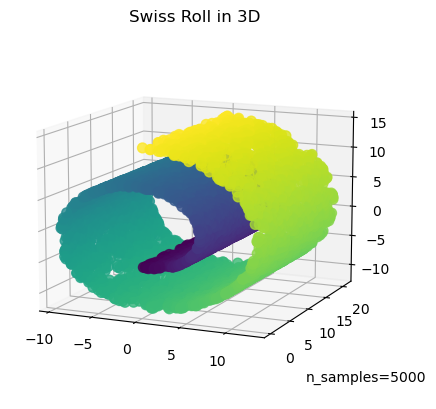

In [5]:
# Plot "swiss-roll" in 3D scatter-plot
fig = plt.figure()
ax = fig.add_subplot(111, projection="3d")
fig.add_axes(ax)
ax.scatter(sk_data[:, 0], sk_data[:, 1], sk_data[:, 2], c=sk_dist, s=50, alpha=0.8)
ax.set_title("Swiss Roll in 3D")
ax.view_init(azim=-66, elev=12)
_ = ax.text2D(0.8, 0.05, s="n_samples=5000", transform=ax.transAxes)

In [6]:
# Fit data
max_dist = 60.0
l = 10
diffMap = model.DiffusionMap(numEigen=l)
diffMap.fit(sk_data, max_dist=max_dist)

# Compute accuracy
print(diffMap.acc(sk_data, diffMap.dMap[:,0], diffMap.dMap[:,4]))

14.97575828902164


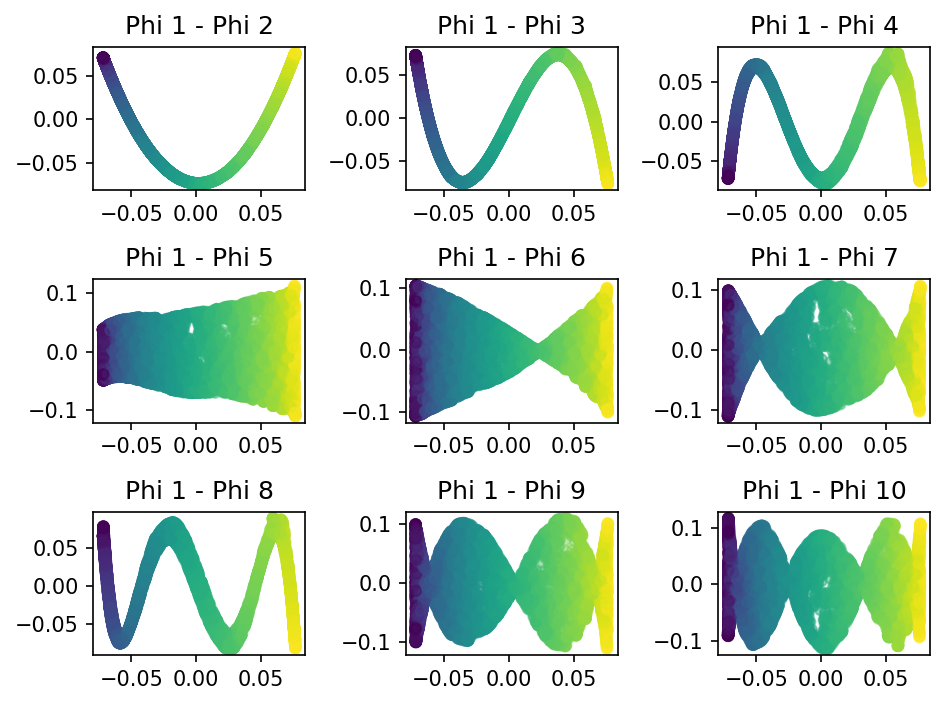

In [7]:
# Scatter plot all
dm = [diffMap.dMap[:,x] for x in range(l)]

fig, axs = plt.subplots(3, 3)
fig.set_dpi(150)
for i in range(3):
    for j in range(3):
        axs[i, j].set_title("Phi {} - Phi {}".format(1, 3*i+j+1+1))
        axs[i, j].scatter(dm[0], dm[3*i+j+1], c=sk_dist, s=25, alpha=0.5)
fig.tight_layout()

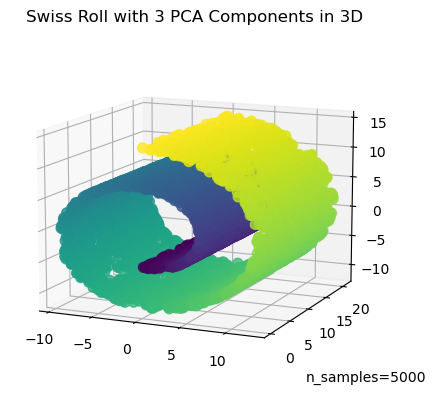

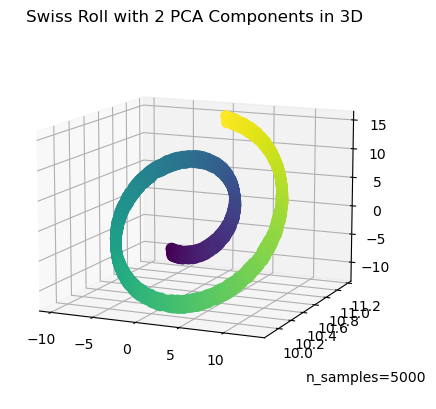

In [8]:
# PCA on 5k
pca = pca_model.ReversiblePCA()
data_t = sk_data
pca.fit(data_t)
comp_counts = [3, 2]
def f(x):
    return pca.reverse_transform(pca.transform(data_t,x))
for x in comp_counts:
    im = f(x)

    # Plot "swiss-roll" in 3D scatter-plot
    fig = plt.figure()
    ax = fig.add_subplot(111, projection="3d")
    fig.add_axes(ax)
    ax.scatter(im[:, 0], im[:, 1], im[:, 2], c=sk_dist, s=50, alpha=0.8)
    ax.set_title("Swiss Roll with {} PCA Components in 3D".format(x))
    ax.view_init(azim=-66, elev=12)
    _ = ax.text2D(0.8, 0.05, s="n_samples=5000", transform=ax.transAxes)

In [9]:
# Less data points
# Generate "swiss-roll" data from sklearn
N = 1000
sk_data_1k = sk.datasets.make_swiss_roll(N, random_state=69)
sk_dist_1k = sk_data_1k[1]
sk_data_1k = sk_data_1k[0]

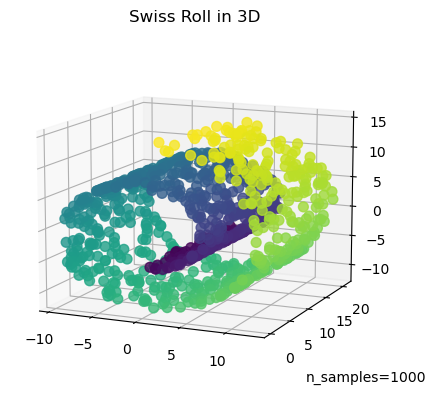

In [10]:
# Plot "swiss-roll" in 3D scatter-plot
fig = plt.figure()
ax = fig.add_subplot(111, projection="3d")
fig.add_axes(ax)
ax.scatter(sk_data_1k[:, 0], sk_data_1k[:, 1], sk_data_1k[:, 2], c=sk_dist_1k, s=50, alpha=0.8)
ax.set_title("Swiss Roll in 3D")
ax.view_init(azim=-66, elev=12)
_ = ax.text2D(0.8, 0.05, s="n_samples=1000", transform=ax.transAxes)

In [12]:
# Fit data
diffMap_1k = model.DiffusionMap(numEigen=l)
diffMap_1k.fit(sk_data_1k, max_dist=max_dist)

# Compute accuracy
print(diffMap.acc(sk_data_1k, diffMap_1k.dMap[:,0], diffMap_1k.dMap[:,4]))

14.914274869410871


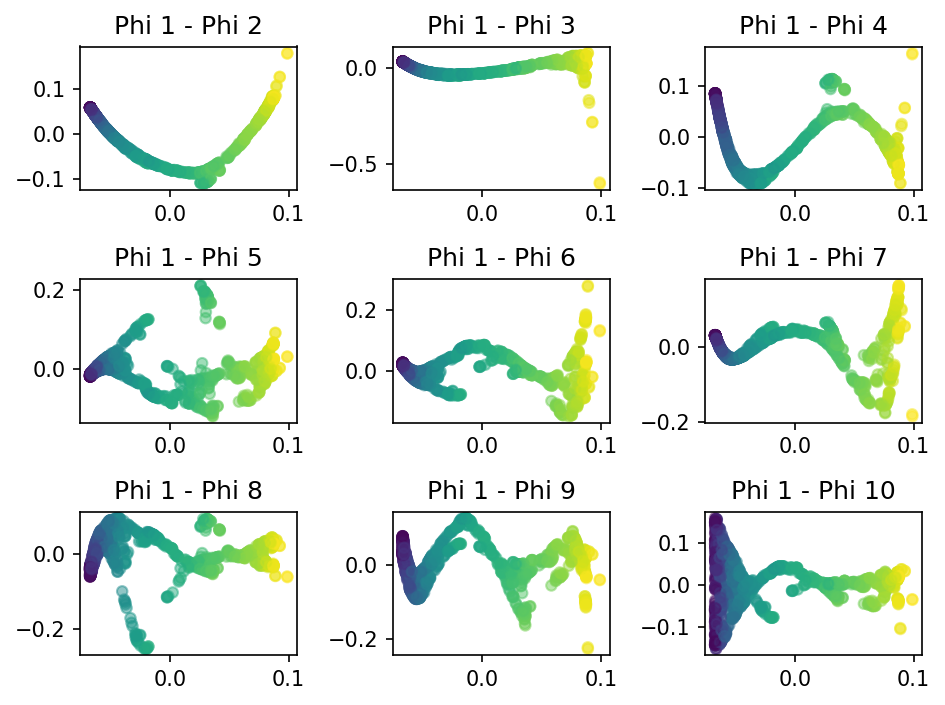

In [13]:
# Scatter plot all
dm_1k = [diffMap_1k.dMap[:,x] for x in range(l)]

fig, axs = plt.subplots(3, 3)
fig.set_dpi(150)
for i in range(3):
    for j in range(3):
        axs[i, j].set_title("Phi {} - Phi {}".format(1, 3*i+j+1+1))
        axs[i, j].scatter(dm_1k[0], dm_1k[3*i+j+1], c=sk_dist_1k, s=25, alpha=0.5)
fig.tight_layout()

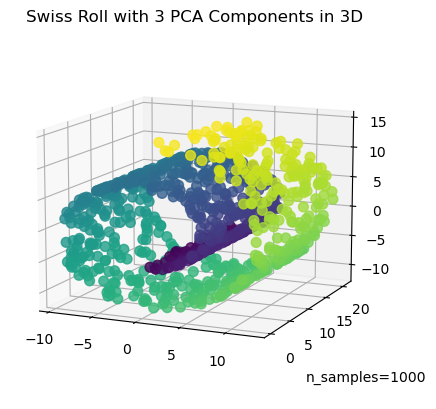

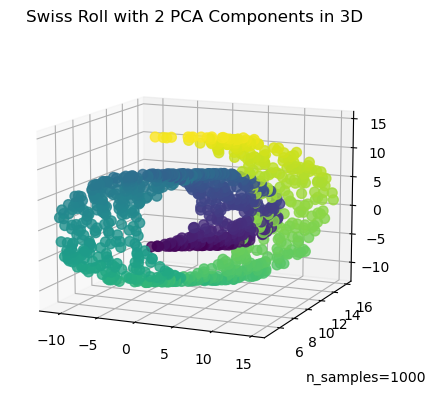

In [14]:
# PCA on 1k points
pca = pca_model.ReversiblePCA()
data_t = sk_data_1k
pca.fit(data_t)
comp_counts = [3, 2]
def f(x):
    return pca.reverse_transform(pca.transform(data_t,x))
for x in comp_counts:
    im = f(x)

    # Plot "swiss-roll" in 3D scatter-plot
    fig = plt.figure()
    ax = fig.add_subplot(111, projection="3d")
    fig.add_axes(ax)
    ax.scatter(im[:, 0], im[:, 1], im[:, 2], c=sk_dist_1k, s=50, alpha=0.8)
    ax.set_title("Swiss Roll with {} PCA Components in 3D".format(x))
    ax.view_init(azim=-66, elev=12)
    _ = ax.text2D(0.8, 0.05, s="n_samples=1000", transform=ax.transAxes)